In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd
import seaborn as sns 
import re
# to make this notebook's output stable across runs
np.random.seed(123)
import scipy
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from sklearn.model_selection import cross_validate

In [2]:
#required imports
import numpy as np
import pandas as pd
np.random.seed(123)
import scipy
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import ensemble
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
import plotly.express as px
from matplotlib import rcParams
from random import randint
from datetime import datetime
from datetime import date, timedelta
import time
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from yellowbrick.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
plt.figure(figsize=(24,14))


<Figure size 1728x1008 with 0 Axes>

<Figure size 1728x1008 with 0 Axes>

In [3]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
rcParams['figure.figsize'] = 20,16

In [4]:
def get_roc_score(model):
    cv_results = cross_validate(model, X_train, np.ravel(y_train),scoring='roc_auc', cv=5)
    sorted(cv_results.keys())
    ['fit_time', 'score_time', 'test_score']
    print("The roc_auc scores:",cv_results['test_score'])
    print("The mean roc_acuc score is:",cv_results['test_score'].mean())

In [5]:
def find_features(model):
    #Takes a fitted model.
    #Returns a dataframe of featue importances from the model.
    calc_importance=model.feature_importances_
    important_features=list(zip(column_names,calc_importance))
    important_features=pd.DataFrame(important_features)
    important_features.rename(columns={0:'feature'},inplace=True)
    important_features.rename(columns={1:'value'},inplace=True)
    important_features.sort_values('value', ascending=False,inplace=True)
    return important_features


In [6]:
def plot_important_features(found_features):
    #Make barplot of the best features found by function: find_features.
    useful_data=found_features.iloc[np.r_[4,11:18]]
    print("Features that are not zero",useful_data)
    sns.barplot(x=useful_data['feature'],y=useful_data['value'],data=useful_data)

In [150]:
'''Importing the dataset'''

'Importing the dataset'

In [7]:
train_data= pd.read_csv (r'/Users/beepboop/Desktop/Machine learning/Group_project/visathon_train_data.csv')

In [8]:
train_data.shape

(17654, 20)

In [10]:
train_data

customer_id  vintage   age  gender  dependents occupation  \
0              1.0   3135.0  66.0    Male         0.0   Engineer   
1              6.0   2531.0  42.0    Male         2.0   Engineer   
2              7.0    263.0  42.0  Female         0.0   Engineer   
3              8.0   5922.0  72.0    Male         0.0     Lawyer   
4              9.0   1145.0  46.0    Male         0.0   Engineer   
...            ...      ...   ...     ...         ...        ...   
17649      24208.0   2004.0  34.0  Female         0.0   Engineer   
17650      24209.0   1754.0  48.0    Male         0.0   Engineer   
17651      24210.0    918.0  35.0  Female         0.0   Engineer   
17652      24211.0   1680.0  43.0  Female         0.0   Engineer   
17653      24212.0   3441.0  70.0  Female         0.0     Lawyer   

      customer_nw_category  branch_code  days_since_last_transaction  \
0                   Medium        755.0                        224.0   
1                      Low        388.0                         58.0   
2                   Medium       1666.0                         60.0   
3                     High          1.0                         98.0   
4                   Medium        317.0                        172.0   
...                    ...          ...                          ...   
17649               Medium        275.0                         97.0   
17650                  Low       1415.0                         56.0   
17651               Medium       2545.0                         60.0   
17652                  Low        140.0                        339.0   
17653               Medium        265.0                         32.0   

       current_balance  previous_month_end_balance  \
0              1458.71                     1458.71   
1               927.72                     1401.72   
2             15202.20                    16059.34   
3              7006.93                     7714.19   
4             10096.58                     8519.53   
...                ...                         ...   
17649          2585.55                     2308.48   
17650         26474.05                       34.01   
17651          2897.10                     4325.68   
17652          3227.34                     3227.34   
17653           937.00                      965.57   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                            1458.71                         1449.07   
1                            1643.31                         1871.12   
2                           15211.29                        13798.82   
3                            7859.74                        11232.37   
4                            6511.82                        16314.17   
...                              ...                             ...   
17649                        2386.92                         3274.49   
17650                        7985.55                         1486.99   
17651                        3790.96                         4566.52   
17652                        3227.34                         3207.12   
17653                        3167.26                         6232.00   

       current_month_credit  previous_month_credit  current_month_debit  \
0                      0.20                   0.20                 0.20   
1                      0.33                 714.61               588.62   
2                      0.36                   0.36               857.50   
3                      0.64                   0.64              1299.64   
4                      0.27                   0.27               443.13   
...                     ...                    ...                  ...   
17649                  0.26                   0.26                 8.50   
17650                  0.09                 200.09               188.61   
17651                  0.30                   0.30              1428.87   
17652                  0.61                   0.61           

In [11]:
df=train_data.copy()

In [12]:
df=df.replace({'nan':np.NaN})

In [13]:
df

customer_id  vintage   age  gender  dependents occupation  \
0              1.0   3135.0  66.0    Male         0.0   Engineer   
1              6.0   2531.0  42.0    Male         2.0   Engineer   
2              7.0    263.0  42.0  Female         0.0   Engineer   
3              8.0   5922.0  72.0    Male         0.0     Lawyer   
4              9.0   1145.0  46.0    Male         0.0   Engineer   
...            ...      ...   ...     ...         ...        ...   
17649      24208.0   2004.0  34.0  Female         0.0   Engineer   
17650      24209.0   1754.0  48.0    Male         0.0   Engineer   
17651      24210.0    918.0  35.0  Female         0.0   Engineer   
17652      24211.0   1680.0  43.0  Female         0.0   Engineer   
17653      24212.0   3441.0  70.0  Female         0.0     Lawyer   

      customer_nw_category  branch_code  days_since_last_transaction  \
0                   Medium        755.0                        224.0   
1                      Low        388.0                         58.0   
2                   Medium       1666.0                         60.0   
3                     High          1.0                         98.0   
4                   Medium        317.0                        172.0   
...                    ...          ...                          ...   
17649               Medium        275.0                         97.0   
17650                  Low       1415.0                         56.0   
17651               Medium       2545.0                         60.0   
17652                  Low        140.0                        339.0   
17653               Medium        265.0                         32.0   

       current_balance  previous_month_end_balance  \
0              1458.71                     1458.71   
1               927.72                     1401.72   
2             15202.20                    16059.34   
3              7006.93                     7714.19   
4             10096.58                     8519.53   
...                ...                         ...   
17649          2585.55                     2308.48   
17650         26474.05                       34.01   
17651          2897.10                     4325.68   
17652          3227.34                     3227.34   
17653           937.00                      965.57   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                            1458.71                         1449.07   
1                            1643.31                         1871.12   
2                           15211.29                        13798.82   
3                            7859.74                        11232.37   
4                            6511.82                        16314.17   
...                              ...                             ...   
17649                        2386.92                         3274.49   
17650                        7985.55                         1486.99   
17651                        3790.96                         4566.52   
17652                        3227.34                         3207.12   
17653                        3167.26                         6232.00   

       current_month_credit  previous_month_credit  current_month_debit  \
0                      0.20                   0.20                 0.20   
1                      0.33                 714.61               588.62   
2                      0.36                   0.36               857.50   
3                      0.64                   0.64              1299.64   
4                      0.27                   0.27               443.13   
...                     ...                    ...                  ...   
17649                  0.26                   0.26                 8.50   
17650                  0.09                 200.09               188.61   
17651                  0.30                   0.30              1428.87   
17652                  0.61                   0.61           

In [14]:
nf=df.copy()

In [15]:
#######The below code makes churn binary classifier
nf['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

In [16]:
nf

customer_id  vintage   age  gender  dependents occupation  \
0              1.0   3135.0  66.0    Male         0.0   Engineer   
1              6.0   2531.0  42.0    Male         2.0   Engineer   
2              7.0    263.0  42.0  Female         0.0   Engineer   
3              8.0   5922.0  72.0    Male         0.0     Lawyer   
4              9.0   1145.0  46.0    Male         0.0   Engineer   
...            ...      ...   ...     ...         ...        ...   
17649      24208.0   2004.0  34.0  Female         0.0   Engineer   
17650      24209.0   1754.0  48.0    Male         0.0   Engineer   
17651      24210.0    918.0  35.0  Female         0.0   Engineer   
17652      24211.0   1680.0  43.0  Female         0.0   Engineer   
17653      24212.0   3441.0  70.0  Female         0.0     Lawyer   

      customer_nw_category  branch_code  days_since_last_transaction  \
0                   Medium        755.0                        224.0   
1                      Low        388.0                         58.0   
2                   Medium       1666.0                         60.0   
3                     High          1.0                         98.0   
4                   Medium        317.0                        172.0   
...                    ...          ...                          ...   
17649               Medium        275.0                         97.0   
17650                  Low       1415.0                         56.0   
17651               Medium       2545.0                         60.0   
17652                  Low        140.0                        339.0   
17653               Medium        265.0                         32.0   

       current_balance  previous_month_end_balance  \
0              1458.71                     1458.71   
1               927.72                     1401.72   
2             15202.20                    16059.34   
3              7006.93                     7714.19   
4             10096.58                     8519.53   
...                ...                         ...   
17649          2585.55                     2308.48   
17650         26474.05                       34.01   
17651          2897.10                     4325.68   
17652          3227.34                     3227.34   
17653           937.00                      965.57   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                            1458.71                         1449.07   
1                            1643.31                         1871.12   
2                           15211.29                        13798.82   
3                            7859.74                        11232.37   
4                            6511.82                        16314.17   
...                              ...                             ...   
17649                        2386.92                         3274.49   
17650                        7985.55                         1486.99   
17651                        3790.96                         4566.52   
17652                        3227.34                         3207.12   
17653                        3167.26                         6232.00   

       current_month_credit  previous_month_credit  current_month_debit  \
0                      0.20                   0.20                 0.20   
1                      0.33                 714.61               588.62   
2                      0.36                   0.36               857.50   
3                      0.64                   0.64              1299.64   
4                      0.27                   0.27               443.13   
...                     ...                    ...                  ...   
17649                  0.26                   0.26                 8.50   
17650                  0.09                 200.09               188.61   
17651                  0.30                   0.30              1428.87   
17652                  0.61                   0.61           

In [33]:
X

customer_id  vintage   age  gender  dependents  occupation  \
2              7.0    263.0  42.0  Female         0.0    Engineer   
3              8.0   5922.0  72.0    Male         0.0      Lawyer   
4              9.0   1145.0  46.0    Male         0.0    Engineer   
5             10.0   2132.0  31.0    Male         0.0  Accountant   
6             11.0   3379.0  40.0    Male         3.0    Engineer   
...            ...      ...   ...     ...         ...         ...   
17649      24208.0   2004.0  34.0  Female         0.0    Engineer   
17650      24209.0   1754.0  48.0    Male         0.0    Engineer   
17651      24210.0    918.0  35.0  Female         0.0    Engineer   
17652      24211.0   1680.0  43.0  Female         0.0    Engineer   
17653      24212.0   3441.0  70.0  Female         0.0      Lawyer   

      customer_nw_category  branch_code  days_since_last_transaction  \
2                   Medium       1666.0                         60.0   
3                     High          1.0                         98.0   
4                   Medium        317.0                        172.0   
5                   Medium       4110.0                         19.0   
6                   Medium         38.0                          0.0   
...                    ...          ...                          ...   
17649               Medium        275.0                         97.0   
17650                  Low       1415.0                         56.0   
17651               Medium       2545.0                         60.0   
17652                  Low        140.0                        339.0   
17653               Medium        265.0                         32.0   

       current_balance  previous_month_end_balance  \
2             15202.20                    16059.34   
3              7006.93                     7714.19   
4             10096.58                     8519.53   
5              1355.86                     1355.86   
6              4957.95                     4244.38   
...                ...                         ...   
17649          2585.55                     2308.48   
17650         26474.05                       34.01   
17651          2897.10                     4325.68   
17652          3227.34                     3227.34   
17653           937.00                      965.57   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
2                           15211.29                        13798.82   
3                            7859.74                        11232.37   
4                            6511.82                        16314.17   
5                            1702.44                         1126.13   
6                            2168.53                         1864.33   
...                              ...                             ...   
17649                        2386.92                         3274.49   
17650                        7985.55                         1486.99   
17651                        3790.96                         4566.52   
17652                        3227.34                         3207.12   
17653                        3167.26                         6232.00   

       current_month_credit  previous_month_credit  current_month_debit  \
2                      0.36                   0.36               857.50   
3                      0.64                   0.64              1299.64   
4                      0.27                   0.27               443.13   
5                    714.51                 121.09               714.51   
6                   6912.29                4206.13              1887.30   
...                     ...                    ...                  ...   
17649                  0.26                   0.26                 8.50   
17650                  0.09                 200.09               188.61   
17651                  0.30                   0.30              1428.87   
17652                  0.61                   0.6

In [28]:
nf.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn'],
      dtype='object')

In [40]:
nf['churn']

2        1
3        1
4        1
5        1
6        1
        ..
17649    1
17650    1
17651    1
17652    1
17653    0
Name: churn, Length: 17652, dtype: int64

In [ ]:
#Binning of variables to be included in the pipeline.

In [41]:
categorical_vars=['gender','occupation','customer_nw_category']

In [42]:
numeric_data=['customer_id', 'vintage', 'age', 'dependents', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance']

In [43]:
#Dealing with the categorical variables.

missing_cat_data=('imputer', SimpleImputer(strategy='constant', fill_value='missing'))

cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))

cat_steps = [missing_cat_data,cat_ohe_step]

cat_pipe = Pipeline(cat_steps)

cat_transformers = [('cat', cat_pipe, categorical_vars)]

#Next dealing with the numeric variables.

num_scl_step = ('scl', MinMaxScaler())

num_knn_step=('knn_impute',KNNImputer(n_neighbors=5))

num_steps = [num_scl_step,num_knn_step]

num_pipe = Pipeline(num_steps)

num_transformers = [('num', num_pipe, numeric_data)]

In [45]:
discrete_vars=numeric_data

In [46]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(nf[categorical_vars + discrete_vars])
X = ct.transform(nf[categorical_vars + discrete_vars])
y = nf[['churn']].values

In [49]:
def get_roc_score(model):
    cv_results = cross_validate(model, X_train, np.ravel(y_train),scoring='roc_auc', cv=5)
    sorted(cv_results.keys())
    ['fit_time', 'score_time', 'test_score']
    print("The roc_auc scores:",cv_results['test_score'])
    print("The mean roc_acuc score is:",cv_results['test_score'].mean())

In [50]:

def find_features(model):
    #Takes a fitted model.
    #Returns a dataframe of featue importances from the model.
    calc_importance=model.feature_importances_
    important_features=list(zip(column_names,calc_importance))
    important_features=pd.DataFrame(important_features)
    important_features.rename(columns={0:'feature'},inplace=True)
    important_features.rename(columns={1:'value'},inplace=True)
    important_features.sort_values('value', ascending=False,inplace=True)
    return important_features

In [51]:
def plot_important_features(found_features):
    #Make barplot of the best features found by function: find_features.
    useful_data=found_features.iloc[np.r_[4,11:18]]
    print("Features that are not zero",useful_data)
    sns.barplot(x=useful_data['feature'],y=useful_data['value'],data=useful_data)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15611, stratify=y)

In [48]:
gbc=ensemble.GradientBoostingClassifier(n_estimators=70,min_samples_split=600,max_depth=9,random_state=15611)
gbc.fit(X_train,np.ravel(y_train))

GradientBoostingClassifier(max_depth=9, min_samples_split=600, n_estimators=70,
                           random_state=15611)

In [52]:

get_roc_score(gbc)

The roc_auc scores: [0.823083   0.81203617 0.83778893 0.8133743  0.83480359]
The mean roc_acuc score is: 0.8242171971962653


In [54]:
column_names=['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance']

In [ ]:
#Looking for the most important feature columns in our dataset.

In [55]:
find_features(gbc)

feature     value
17           current_month_balance  0.489307
12  average_monthly_balance_prevQ2  0.023931
18          previous_month_balance  0.022252
15             current_month_debit  0.010353
11   average_monthly_balance_prevQ  0.009104
13            current_month_credit  0.006635
16            previous_month_debit  0.005968
14           previous_month_credit  0.003284
4                       dependents  0.002051
9                  current_balance  0.001537
5                       occupation  0.000683
2                              age  0.000185
7                      branch_code  0.000104
8      days_since_last_transaction  0.000100
10      previous_month_end_balance  0.000000
1                          vintage  0.000000
6             customer_nw_category  0.000000
3                           gender  0.000000
0                      customer_id  0.000000

Barplot showing features from the original data against calculated featrure importance.
Features that are not zero                           feature     value
11  average_monthly_balance_prevQ  0.009104
2                             age  0.000185
7                     branch_code  0.000104
8     days_since_last_transaction  0.000100
10     previous_month_end_balance  0.000000
1                         vintage  0.000000
6            customer_nw_category  0.000000
3                          gender  0.000000


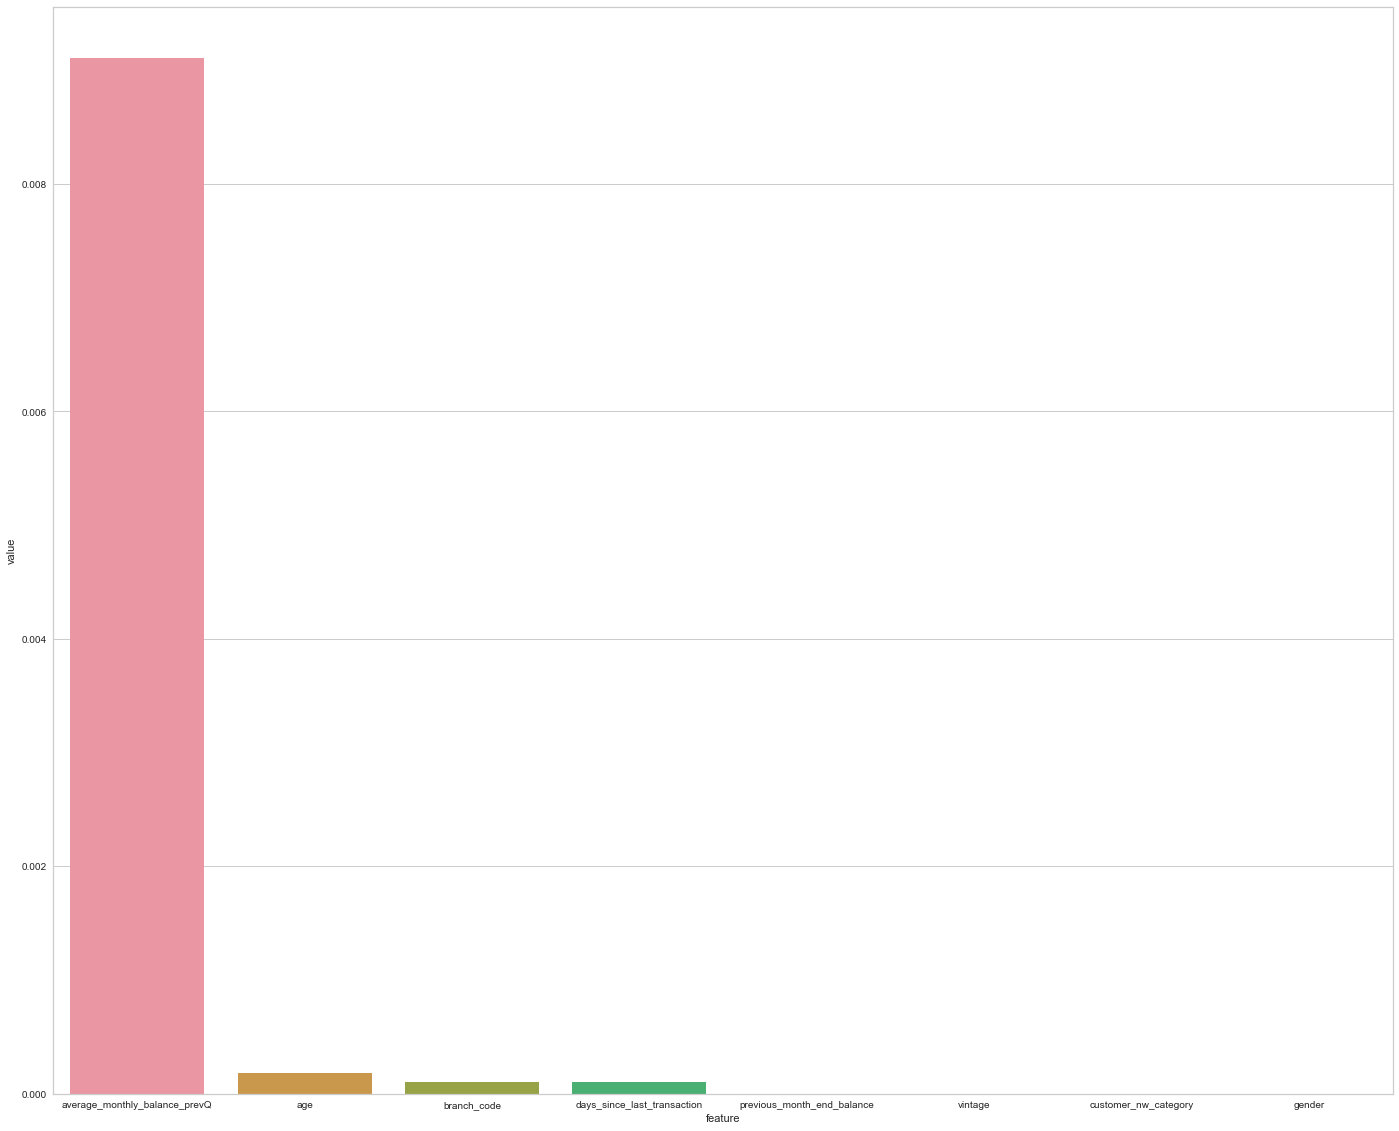

In [153]:
print("Barplot showing features from the original data against calculated featrure importance.")
plot_important_features(find_features(gbc))

In [62]:
len(column_names)

19

In [152]:
rcParams['figure.figsize'] = 24,20

In [69]:
gbc_test=ensemble.GradientBoostingClassifier(random_state=15611)
gbc_test.fit(X_train,np.ravel(y_train))

GradientBoostingClassifier(random_state=15611)

In [70]:
y_pred_knn=gbc_test.predict(X_test)

In [71]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.7066175576233047


In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=15611)
rfc.fit(X_train, np.ravel(y_train))

RandomForestClassifier(random_state=15611)

In [73]:
y_pred_knn=rfc.predict(X_test)

In [74]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.7038945143830202


In [75]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, np.ravel(y_train))

KNeighborsClassifier()

In [76]:
y_pred_knn=neigh.predict(X_test)

In [77]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.5057349632062276


In [78]:
dec=DecisionTreeClassifier(random_state=15611)
dec.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(random_state=15611)

In [79]:
y_pred_knn=dec.predict(X_test)

In [80]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.6578544061302682


In [124]:
ada_clf=AdaBoostClassifier(random_state=15611)
ada_clf.fit(X_train,np.ravel(y_train))

AdaBoostClassifier(random_state=15611)

In [125]:
y_pred_knn=ada_clf.predict(X_test)

In [126]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.6713776379006264


In [85]:
ext_t=ExtraTreesClassifier(random_state=15611)
ext_t.fit(X_train,np.ravel(y_train))

ExtraTreesClassifier(random_state=15611)

In [86]:
y_pred_knn=ext_t.predict(X_test)

In [87]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.6047132518396886


In [89]:
start_rfc_155=time.time()
rfc_pca_155=RandomForestClassifier(random_state=15611)
rfc_pca_155.fit(X_train,np.ravel(y_train))
stop_rfc_155=time.time()

In [91]:
y_pred_knn=rfc_pca_155.predict(X_test)

In [92]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.7038945143830202


In [96]:
now =time.time()
svm_clf_rbf = SVC(kernel="rbf",C=100)

svm_clf_rbf.fit(X_train, np.ravel(y_train))


end_train_svm_clf=time.time()

In [97]:
y_pred_knn=svm_clf_rbf.predict(X_test)

In [98]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.5059493401447425


In [99]:
now =time.time()
svm_clf_poly = SVC(kernel="poly")

svm_clf_poly.fit(X_train, np.ravel(y_train))


end_train_svm_clf=time.time()

In [100]:
y_pred_knn=svm_clf_poly.predict(X_test)

In [101]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.5


In [102]:
now =time.time()
svm_clf_poly = SVC(kernel='linear')

svm_clf_poly.fit(X_train, np.ravel(y_train))


end_train_svm_clf=time.time()

In [103]:
y_pred_knn=svm_clf_poly.predict(X_test)

In [104]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.5


In [115]:
final_rfc=test_rfc=RandomForestClassifier(random_state=15611,n_estimators=600,min_samples_split=50,criterion='gini')
start=time.time()
final_rfc.fit(X_train, np.ravel(y_train))
stop=time.time()

In [149]:
joblib.dump(final_rfc, 'best_rfc.joblib')

['best_rfc.joblib']

In [116]:
y_pred_knn=final_rfc.predict(X_test)

In [117]:
#tuned RFC ROC_AUC_Accuracy: 0.6784840053518215  0.6901933953658091


In [118]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.6939875630967585


In [109]:
gbc=ensemble.GradientBoostingClassifier(n_estimators=70,min_samples_split=600,max_depth=9,random_state=15611)
gbc.fit(X_train,np.ravel(y_train))

GradientBoostingClassifier(max_depth=9, min_samples_split=600, n_estimators=70,
                           random_state=15611)

In [148]:
joblib.dump(ada_clf, 'best_gbc.joblib')

['best_gbc.joblib']

In [110]:
y_pred_knn=gbc.predict(X_test)

In [ ]:
#tuned GBC

In [111]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.7194239189928845


In [ ]:
#final dec 

In [ ]:
0.6782262969044579

In [143]:
ada_clf=AdaBoostClassifier(random_state=15611,n_estimators =115)
ada_start=time.time()
ada_clf.fit(X_train,np.ravel(y_train))

AdaBoostClassifier(n_estimators=115, random_state=15611)

In [147]:
import joblib
joblib.dump(ada_clf, 'best_ada.joblib')

['best_ada.joblib']

In [120]:
ada_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 15611}

In [144]:
y_pred_knn=ada_clf.predict(X_test)

In [123]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn)) #ROC_AUC_Accuracy: 0.6713776379006264


ROC_AUC_Accuracy: 0.6740748342759837


In [130]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn)) #n_est ==65

ROC_AUC_Accuracy: 0.6814351091649942


In [133]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))v# 85

ROC_AUC_Accuracy: 0.6857713008575077


In [136]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn)) #105

ROC_AUC_Accuracy: 0.6908129599221553


In [145]:
print("ROC_AUC_Accuracy:",roc_auc_score(y_test, y_pred_knn))

ROC_AUC_Accuracy: 0.6879393967037646
